モジュールをnumpyroで使いMCMCができるかテストする

In [24]:
import numpyro
import numpyro.distributions as dist
from numpyro import (
    sample,
    plate,
)
from numpyro.distributions import constraints
from numpyro.infer import MCMC, NUTS, Predictive
import jax.random as random

In [8]:
import numpy as np
import jax.numpy as jnp

def f(x,p):
    return jnp.dot(p, jnp.array([x**2, x*1, jnp.sqrt(x)]))

In [76]:
def data(p=jnp.array([0,1,1])):
    x = jnp.linspace(0, 1, 100)
    y = f(x,p) + 0.05*random.normal(key=random.PRNGKey(0), shape=(100,))
    return x, y

In [77]:
import matplotlib.pyplot as plt

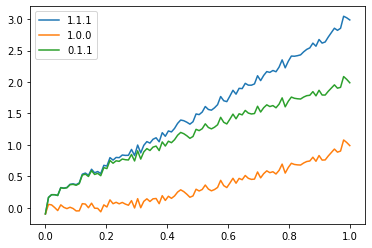

In [78]:
x,y = data(p=jnp.array([1,1,1]))
plt.plot(x,y,label='1.1.1')

x,y = data(p=jnp.array([1,0,0]))
plt.plot(x,y,label='1.0.0')

x,y = data(p=jnp.array([0,1,1]))
plt.plot(x,y,label='0.1.1')

plt.legend()

In [79]:
sample('dicr', dist.Dirichlet(concentration=jnp.array([0.5,0.5,0.5])), rng_key=random.PRNGKey(2))
#sample('b', dist.Bernoulli(probs=jnp.array([0.5,0.5,0.5])), rng_key=random.PRNGKey(3))

Array([0.10472871, 0.56492996, 0.33034137], dtype=float32)

In [110]:
def model(X, Y, N):
    # set uninformative log-normal priors on our three kernel hyperparameters
    probs = sample('dicr', dist.Dirichlet(concentration=jnp.array([0.5,0.5,0.5])))
    p = sample('p', dist.Bernoulli(probs=probs))
    sig = sample('sig', dist.LogNormal(0,1))
    # compute kernel
    #y = f(X, p)
    # sample Y according to the standard gaussian process formula
    sample("obs",dist.Normal(X, sig), obs=Y)

In [111]:
kernel = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(kernel, num_warmup=300, num_samples=1000)
mcmc.run(random.PRNGKey(0), X=x, Y=y, N=x.shape[0])

/var/folders/5y/dbgclc7j44b8481c5__rr_p40000gn/T/ipykernel_84197/882329494.py:3: FutureWarning: Some algorithms will automatically enumerate the discrete latent site p of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  mcmc.run(random.PRNGKey(0), X=x, Y=y, N=x.shape[0])


ValueError: Missing a plate statement for batch dimension -1 at site 'p'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.